## E4040 2024 Fall Project
### Improving CNN Robustness via CS Shapley Value-guided Augmentation

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

tf.test.gpu_device_name()

'/device:GPU:0'

### Import CIFAR-10 data and training ResNet18 with 140 epochs

In [2]:
from utils.ResNet18_trainer import ResNet18_trainer, load_cifar10_dataset

In [13]:
batch_size = 128
lr = 0.1
momentum = 0.9
decay = 0.0005
epochs=140
num_classes=10
checkpoint_dir="./checkpoints1"
model_path = "./saved_model1"

In [4]:
train_ds, test_ds = load_cifar10_dataset(batch_size)

In [14]:
trainer = ResNet18_trainer(
    train_ds=train_ds,
    test_ds=test_ds,
    num_classes=num_classes,
    epochs=epochs,
    batch_size=batch_size,
    lr=lr,
    momentum=momentum,
    decay=decay,
    checkpoint_dir=checkpoint_dir
)

In [6]:
trainer.run()

No checkpoint found. Starting from scratch.
Training Epoch 1
Epoch 1, Loss: 2.095428228378296, Accuracy: 28.255998611450195, Test Loss: 1.6118888854980469, Test Accuracy: 44.040000915527344, Training Time: 0:01:02.430005
Checkpoint saved at: ./checkpoints1/ckpt_epoch_1.h5
Training Epoch 2
Epoch 2, Loss: 2.0771191120147705, Accuracy: 30.57200050354004, Test Loss: 1.758311152458191, Test Accuracy: 38.08000183105469, Training Time: 0:00:58.540582
Checkpoint saved at: ./checkpoints1/ckpt_epoch_2.h5
Training Epoch 3
Epoch 3, Loss: 1.4639434814453125, Accuracy: 46.21799850463867, Test Loss: 1.309072732925415, Test Accuracy: 52.53000259399414, Training Time: 0:00:58.790855
Checkpoint saved at: ./checkpoints1/ckpt_epoch_3.h5
Training Epoch 4
Epoch 4, Loss: 1.2046153545379639, Accuracy: 56.906002044677734, Test Loss: 1.1565386056900024, Test Accuracy: 58.71999740600586, Training Time: 0:00:58.762463
Checkpoint saved at: ./checkpoints1/ckpt_epoch_4.h5
Training Epoch 5
Epoch 5, Loss: 0.9929884672

Epoch 37, Loss: 0.08447953313589096, Accuracy: 96.98200225830078, Test Loss: 0.4645468294620514, Test Accuracy: 89.20000457763672, Training Time: 0:00:58.841239
Checkpoint saved at: ./checkpoints1/ckpt_epoch_37.h5
Training Epoch 38
Epoch 38, Loss: 0.085748091340065, Accuracy: 96.93800354003906, Test Loss: 0.48411452770233154, Test Accuracy: 88.5, Training Time: 0:00:58.810697
Checkpoint saved at: ./checkpoints1/ckpt_epoch_38.h5
Training Epoch 39
Epoch 39, Loss: 0.07480915635824203, Accuracy: 97.34600067138672, Test Loss: 0.4428410530090332, Test Accuracy: 89.27999877929688, Training Time: 0:00:58.849068
Checkpoint saved at: ./checkpoints1/ckpt_epoch_39.h5
Training Epoch 40
Epoch 40, Loss: 0.07089778035879135, Accuracy: 97.55999755859375, Test Loss: 0.46736419200897217, Test Accuracy: 89.13999938964844, Training Time: 0:00:58.752263
Checkpoint saved at: ./checkpoints1/ckpt_epoch_40.h5
Training Epoch 41
Epoch 41, Loss: 0.06685659289360046, Accuracy: 97.66400146484375, Test Loss: 0.496510

In [6]:
trainer.run()

Restored from checkpoint: ./checkpoints1/ckpt_epoch_60.ckpt
Restored from epoch 60: 
Training Epoch 61
Epoch 61, Loss: 0.44261810183525085, Accuracy: 85.08399963378906, Test Loss: 0.5024479031562805, Test Accuracy: 83.81000518798828, Training Time: 0:01:04.152498
Checkpoint saved at: ./checkpoints1/ckpt_epoch_61.h5
Training Epoch 62
Epoch 62, Loss: 0.284915030002594, Accuracy: 90.02799987792969, Test Loss: 0.45613089203834534, Test Accuracy: 85.25999450683594, Training Time: 0:00:58.576929
Checkpoint saved at: ./checkpoints1/ckpt_epoch_62.h5
Training Epoch 63
Epoch 63, Loss: 0.22565360367298126, Accuracy: 92.03199768066406, Test Loss: 0.45200785994529724, Test Accuracy: 85.86000061035156, Training Time: 0:00:58.789581
Checkpoint saved at: ./checkpoints1/ckpt_epoch_63.h5
Training Epoch 64
Epoch 64, Loss: 0.18694275617599487, Accuracy: 93.43399810791016, Test Loss: 0.45817068219184875, Test Accuracy: 86.41999816894531, Training Time: 0:00:58.659695
Checkpoint saved at: ./checkpoints1/ckp

Epoch 96, Loss: 0.005977038759738207, Accuracy: 99.80599975585938, Test Loss: 0.48064345121383667, Test Accuracy: 91.97000122070312, Training Time: 0:00:58.738800
Checkpoint saved at: ./checkpoints1/ckpt_epoch_96.h5
Training Epoch 97
Epoch 97, Loss: 0.0054877991788089275, Accuracy: 99.84200286865234, Test Loss: 0.4786224365234375, Test Accuracy: 92.04999542236328, Training Time: 0:00:58.732211
Checkpoint saved at: ./checkpoints1/ckpt_epoch_97.h5
Training Epoch 98
Epoch 98, Loss: 0.004552710335701704, Accuracy: 99.85200500488281, Test Loss: 0.47787055373191833, Test Accuracy: 92.00999450683594, Training Time: 0:00:58.696687
Checkpoint saved at: ./checkpoints1/ckpt_epoch_98.h5
Training Epoch 99
Epoch 99, Loss: 0.0047952476888895035, Accuracy: 99.85800170898438, Test Loss: 0.48043131828308105, Test Accuracy: 92.05999755859375, Training Time: 0:00:58.681449
Checkpoint saved at: ./checkpoints1/ckpt_epoch_99.h5
Training Epoch 100
Epoch 100, Loss: 0.004687654320150614, Accuracy: 99.8520050048

In [7]:
trainer.model.save(model_path)
print("Model saved.")

INFO:tensorflow:Assets written to: ./saved_model1/assets
Model saved.


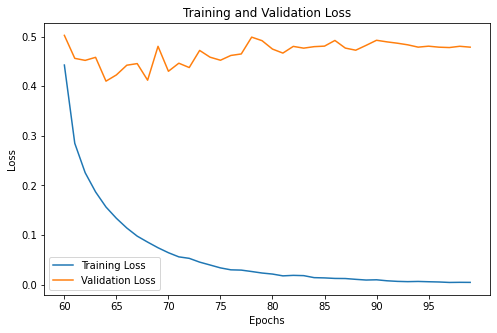

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(range(60, 60 + len(trainer.train_loss_history)), trainer.train_loss_history, label='Training Loss')
plt.plot(range(60, 60 + len(trainer.test_loss_history)), trainer.test_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(range(60, 60 + len(trainer.train_loss_history), 5))
plt.show()


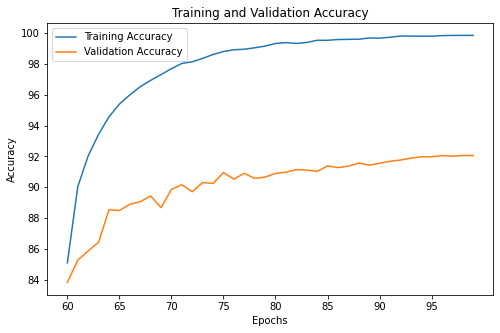

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(60, 60 + len(trainer.train_accuracy_history)), trainer.train_accuracy_history, label='Training Accuracy')
plt.plot(range(60, 60 + len(trainer.test_accuracy_history)), trainer.test_accuracy_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(60, 60 + len(trainer.train_accuracy_history), 5))  # 每5个epoch一个刻度，可以根据需要调整
plt.show()

In [15]:
trainer.run()

Restored from checkpoint: ./checkpoints1/ckpt_epoch_100.ckpt
Restored from epoch 100: 
Training Epoch 101
Epoch 101, Loss: 0.005340726114809513, Accuracy: 99.8239974975586, Test Loss: 0.4893819987773895, Test Accuracy: 91.8699951171875, Training Time: 0:00:58.715466
Checkpoint saved at: ./checkpoints1/ckpt_epoch_101.h5
Training Epoch 102
Epoch 102, Loss: 0.0058425068855285645, Accuracy: 99.83799743652344, Test Loss: 0.491951048374176, Test Accuracy: 91.82999420166016, Training Time: 0:00:58.632257
Checkpoint saved at: ./checkpoints1/ckpt_epoch_102.h5
Training Epoch 103
Epoch 103, Loss: 0.004840197041630745, Accuracy: 99.86799621582031, Test Loss: 0.4882814884185791, Test Accuracy: 91.73999786376953, Training Time: 0:00:58.703623
Checkpoint saved at: ./checkpoints1/ckpt_epoch_103.h5
Training Epoch 104
Epoch 104, Loss: 0.00479491101577878, Accuracy: 99.86799621582031, Test Loss: 0.4824374318122864, Test Accuracy: 92.0199966430664, Training Time: 0:00:58.738997
Checkpoint saved at: ./chec

Epoch 136, Loss: 0.0031460023019462824, Accuracy: 99.91600036621094, Test Loss: 0.49555113911628723, Test Accuracy: 92.20999908447266, Training Time: 0:00:58.902688
Checkpoint saved at: ./checkpoints1/ckpt_epoch_136.h5
Training Epoch 137
Epoch 137, Loss: 0.0026529368478804827, Accuracy: 99.9260025024414, Test Loss: 0.4950634837150574, Test Accuracy: 92.23999786376953, Training Time: 0:00:58.960402
Checkpoint saved at: ./checkpoints1/ckpt_epoch_137.h5
Training Epoch 138
Epoch 138, Loss: 0.0025091252755373716, Accuracy: 99.93000030517578, Test Loss: 0.4960770905017853, Test Accuracy: 92.22000122070312, Training Time: 0:00:58.780115
Checkpoint saved at: ./checkpoints1/ckpt_epoch_138.h5
Training Epoch 139
Epoch 139, Loss: 0.002349924063310027, Accuracy: 99.94999694824219, Test Loss: 0.4971337616443634, Test Accuracy: 92.18000030517578, Training Time: 0:00:58.912651
Checkpoint saved at: ./checkpoints1/ckpt_epoch_139.h5
Training Epoch 140
Epoch 140, Loss: 0.002879330888390541, Accuracy: 99.9

In [16]:
trainer.model.save(model_path)
print("Model saved.")

INFO:tensorflow:Assets written to: ./saved_model1/assets
Model saved.


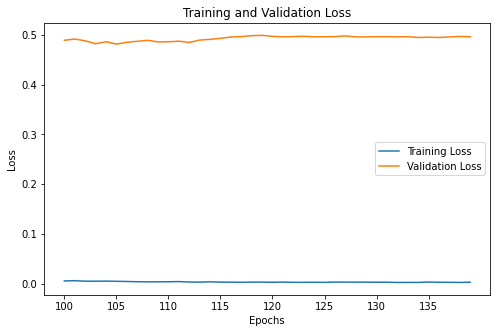

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(range(100, 100 + len(trainer.train_loss_history)), trainer.train_loss_history, label='Training Loss')
plt.plot(range(100, 100 + len(trainer.test_loss_history)), trainer.test_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(range(100, 100 + len(trainer.train_loss_history), 5))
plt.show()


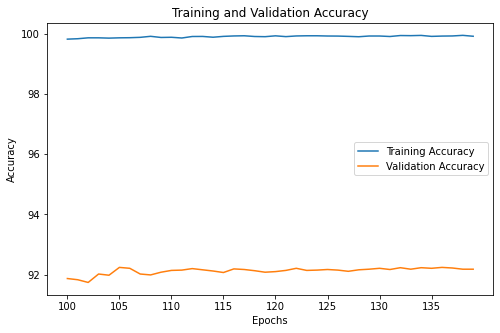

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(range(100, 100 + len(trainer.train_accuracy_history)), trainer.train_accuracy_history, label='Training Accuracy')
plt.plot(range(100, 100 + len(trainer.test_accuracy_history)), trainer.test_accuracy_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(100, 100 + len(trainer.train_accuracy_history), 5))  # 每5个epoch一个刻度，可以根据需要调整
plt.show()